## Pelatihan Dataset
**Import Library**

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

**Loading Dataset**

In [2]:
df = pd.read_csv('theotown_reviews.csv')

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,44019462-ba6a-490e-8322-3cefb4fa14d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,overal dari keseluruhan buat gamenya...sempurn...,5,297,1.12.45a,2026-01-21 01:30:39,Hi HACKSHAW 75! 🌟 Thank you for your kind word...,2026-01-21 02:40:05,1.12.45a
1,03ef1b94-67c6-4981-a19a-842d95c0a7fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"catatan saja bagi developer: bug masih banyak,...",3,8,1.12.45a,2026-01-21 17:11:39,"Hi SaNuHa, thank you for your feedback! We're ...",2026-01-21 18:30:12,1.12.45a
2,f5fdb3f4-15c8-41a7-97ad-52ecdaa79469,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"the game is good, but ada sedikit bug when pla...",5,151,1.12.46a,2026-01-21 10:12:29,Hi Zahra! 🌟 Thank you for your lovely review! ...,2026-01-21 10:20:08,1.12.46a
3,eb602572-f669-4539-832f-30c8308dfcb9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,game bagus. Saya tidak melihat kekurangan nya ...,5,749,1.12.42a,2026-01-14 10:44:09,NaN,NaN,1.12.42a
4,77910ba3-f28c-4653-aebc-89ef46d1c991,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"untuk keseluruhan sih gamenya udah bagus,namun...",4,17,1.12.42a,2026-01-15 08:21:59,NaN,NaN,1.12.42a


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76743 entries, 0 to 76742
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              76743 non-null  object
 1   userName              76743 non-null  object
 2   userImage             76743 non-null  object
 3   content               76743 non-null  object
 4   score                 76743 non-null  int64 
 5   thumbsUpCount         76743 non-null  int64 
 6   reviewCreatedVersion  57092 non-null  object
 7   at                    76743 non-null  object
 8   replyContent          41331 non-null  object
 9   repliedAt             41331 non-null  object
 10  appVersion            57092 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.4+ MB


In [5]:
# drop baris yang memiliki nilai nan dari dataset
clean_df = df.dropna()

In [6]:
# drop baris duplikat dari clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_review_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30402 entries, 0 to 69492
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              30402 non-null  object
 1   userName              30402 non-null  object
 2   userImage             30402 non-null  object
 3   content               30402 non-null  object
 4   score                 30402 non-null  int64 
 5   thumbsUpCount         30402 non-null  int64 
 6   reviewCreatedVersion  30402 non-null  object
 7   at                    30402 non-null  object
 8   replyContent          30402 non-null  object
 9   repliedAt             30402 non-null  object
 10  appVersion            30402 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.8+ MB


**Preprocessing**

In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [9]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [10]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,44019462-ba6a-490e-8322-3cefb4fa14d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,overal dari keseluruhan buat gamenya...sempurn...,5,297,1.12.45a,2026-01-21 01:30:39,Hi HACKSHAW 75! 🌟 Thank you for your kind word...,2026-01-21 02:40:05,1.12.45a
1,03ef1b94-67c6-4981-a19a-842d95c0a7fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"catatan saja bagi developer: bug masih banyak,...",3,8,1.12.45a,2026-01-21 17:11:39,"Hi SaNuHa, thank you for your feedback! We're ...",2026-01-21 18:30:12,1.12.45a
2,f5fdb3f4-15c8-41a7-97ad-52ecdaa79469,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"the game is good, but ada sedikit bug when pla...",5,151,1.12.46a,2026-01-21 10:12:29,Hi Zahra! 🌟 Thank you for your lovely review! ...,2026-01-21 10:20:08,1.12.46a
6,b5029635-6c43-4d5c-a86e-d15b4c736095,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,agak bingung di awal main. tapi setelah nonton...,5,165,1.12.45a,2026-01-20 02:27:27,Hi Vania! 😊 We're thrilled you enjoyed TheoTow...,2026-01-20 03:30:24,1.12.45a
7,31e2b482-beb7-486d-842a-acd55ec12d05,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gamenya seru, harus pinter ngatur strategi keu...",5,482,1.12.42a,2026-01-14 14:29:43,Hi Muhammad! 🌟 Thank you for your fantastic re...,2026-01-14 14:30:16,1.12.42a
...,...,...,...,...,...,...,...,...,...,...,...
69242,1f310880-d9e5-441d-a8b6-6646a3cd0a00,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nice game,5,0,1.2.90,2021-05-21 19:45:55,Awesome! Thank you for your feedback :),2021-05-22 09:42:51,1.2.90
69248,e9148e7b-dd0e-4435-8972-44701a6c9f08,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Yes, how about ability to draw map not just re...",5,5,beta 1.2.78,2017-04-18 16:49:04,May you give us more details about your idea? ...,2017-04-18 21:00:29,beta 1.2.78
69257,44c53a3c-3f9e-44c4-bb7c-b6607bcb8fb2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,I love pls add pepole to it pls for 2 millon d...,5,0,beta 1.2.78,2017-04-18 01:42:16,"Hi, may you give us more details about your id...",2017-04-18 09:50:52,beta 1.2.78
69362,3d1b17e6-e943-491e-9cf3-838f12e57c47,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Can you grant that the cars will pass on both ...,4,16,beta 1.1.74,2016-07-06 21:51:25,You may send me your city to info@theotown.de ...,2016-04-19 11:38:37,beta 1.1.74


In [11]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Membersihkan teks
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [13]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,44019462-ba6a-490e-8322-3cefb4fa14d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,overal dari keseluruhan buat gamenya...sempurn...,5,297,1.12.45a,2026-01-21 01:30:39,Hi HACKSHAW 75! 🌟 Thank you for your kind word...,2026-01-21 02:40:05,1.12.45a,overal dari keseluruhan buat gamenyasempurna p...,overal dari keseluruhan buat gamenyasempurna p...,overal dari keseluruhan buat gamenyasempurna p...,"[overal, dari, keseluruhan, buat, gamenyasempu...","[overal, gamenyasempurna, persis, katakata, sa...",overal gamenyasempurna persis katakata sambuta...
1,03ef1b94-67c6-4981-a19a-842d95c0a7fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"catatan saja bagi developer: bug masih banyak,...",3,8,1.12.45a,2026-01-21 17:11:39,"Hi SaNuHa, thank you for your feedback! We're ...",2026-01-21 18:30:12,1.12.45a,catatan saja bagi developer bug masih banyak d...,catatan saja bagi developer bug masih banyak d...,catatan saja bagi developer bug masih banyak d...,"[catatan, saja, bagi, developer, bug, masih, b...","[catatan, developer, bug, jalan, medan, sulit,...",catatan developer bug jalan medan sulit diatur...
2,f5fdb3f4-15c8-41a7-97ad-52ecdaa79469,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"the game is good, but ada sedikit bug when pla...",5,151,1.12.46a,2026-01-21 10:12:29,Hi Zahra! 🌟 Thank you for your lovely review! ...,2026-01-21 10:20:08,1.12.46a,the game is good but ada sedikit bug when plac...,the game is good but ada sedikit bug when plac...,the game is good but ada sedikit bug when plac...,"[the, game, is, good, but, ada, sedikit, bug, ...","[game, good, bug, placing, building, gem, tota...",game good bug placing building gem total gem g...
6,b5029635-6c43-4d5c-a86e-d15b4c736095,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,agak bingung di awal main. tapi setelah nonton...,5,165,1.12.45a,2026-01-20 02:27:27,Hi Vania! 😊 We're thrilled you enjoyed TheoTow...,2026-01-20 03:30:24,1.12.45a,agak bingung di awal main tapi setelah nonton ...,agak bingung di awal main tapi setelah nonton ...,agak bingung di awal main tapi setelah nonton ...,"[agak, bingung, di, awal, main, tapi, setelah,...","[bingung, main, nonton, tutorial, youtube, udh...",bingung main nonton tutorial youtube udh menge...
7,31e2b482-beb7-486d-842a-acd55ec12d05,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Gamenya seru, harus pinter ngatur strategi keu...",5,482,1.12.42a,2026-01-14 14:29:43,Hi Muhammad! 🌟 Thank you for your fantastic re...,2026-01-14 14:30:16,1.12.42a,Gamenya seru harus pinter ngatur strategi keua...,gamenya seru harus pinter ngatur strategi keua...,gamenya seru harus pinter ngatur strategi keua...,"[gamenya, seru, harus, pinter, ngatur, strateg...","[gamenya, seru, pinter, ngatur, strategi, keua...",gamenya seru pinter ngatur strategi keuangan k...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69242,1f310880-d9e5-441d-a8b6-6646a3cd0a00,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Nice game,5,0,1.2.90,2021-05-21 19:45:55,Awesome! Thank you for your feedback :),2021-05-22 09:42:51,1.2.90,Nice game,nice game,nice game,"[nice, game]","[nice, game]",nice game
69248,e9148e7b-dd0e-4435-8972-44701a6c9f08,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Yes, how about ability to draw map not just re...",5,5,beta 1.2.78,2017-04-18 16:49:04,May you give us more details about your idea? ...,2017-04-18 21:00:29,beta 1.2.78,Yes how about ability to draw map not just rel...,yes how about ability to draw map not just rel...,yes how about ability to draw map not just rel...,"[yes, how, about, ability, to, draw, map, not,...","[yes, ability, draw, map, relying, random, see...",yes ability draw map relying 

**label**

In [14]:
# Labeling dengan lexicon
import csv
import requests
from io import StringIO

# Positive
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')


if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Negative
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [15]:
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
      polarity = 'neutral'

    return score, polarity

In [16]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    13895
negative     8776
neutral      7731
Name: count, dtype: int64


**Visualisasi Data**

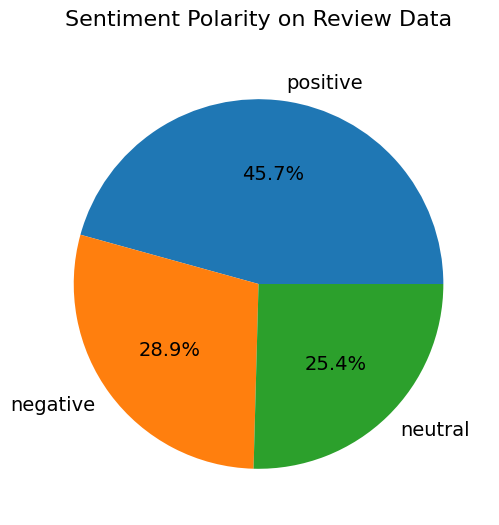

In [17]:
# Pie Chart
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

plt.show()

In [18]:
# Reviews Positive
pd.set_option('display.max_colwidth', 10000)
positive_reviews = clean_df[clean_df['polarity'] == 'positive']
positive_reviews = positive_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_reviews = positive_reviews.sort_values(by='polarity_score', ascending=False)
positive_reviews = positive_reviews.reset_index(drop=True)
positive_reviews.index += 1

In [19]:
# Reviews Negative
pd.set_option('display.max_colwidth', 10000)
negative_reviews = clean_df[clean_df['polarity'] == 'negative']
negative_reviews = negative_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_reviews = negative_reviews.sort_values(by='polarity_score', ascending=True)
negative_reviews = negative_reviews[0:10]
negative_reviews = negative_reviews.reset_index(drop=True)
negative_reviews.index += 1

In [20]:
# Reviews Netral
pd.set_option('display.max_colwidth', 10000)
neutral_reviews = clean_df[clean_df['polarity'] == 'neutral']
neutral_reviews = neutral_reviews[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_reviews = neutral_reviews.sort_values(by='polarity_score', ascending=True)
neutral_reviews = neutral_reviews[0:10]
neutral_reviews = neutral_reviews.reset_index(drop=True)
neutral_reviews.index += 1

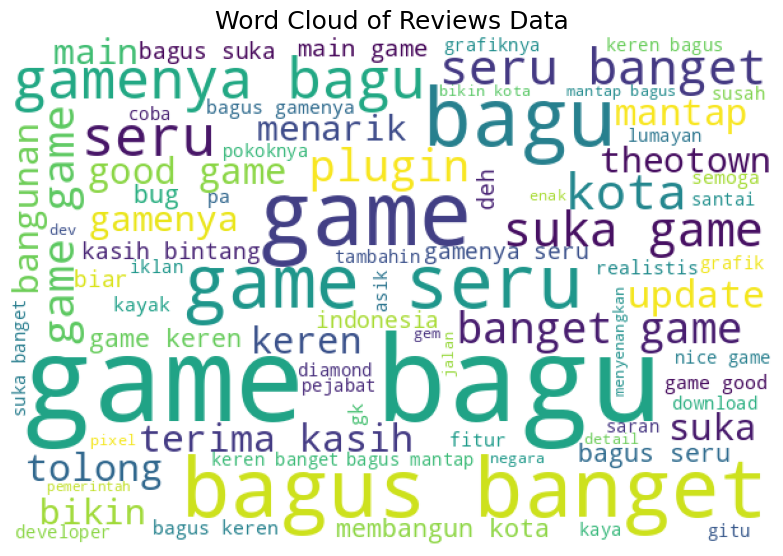

In [21]:
# list word
list_words = ''
for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Reviews Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

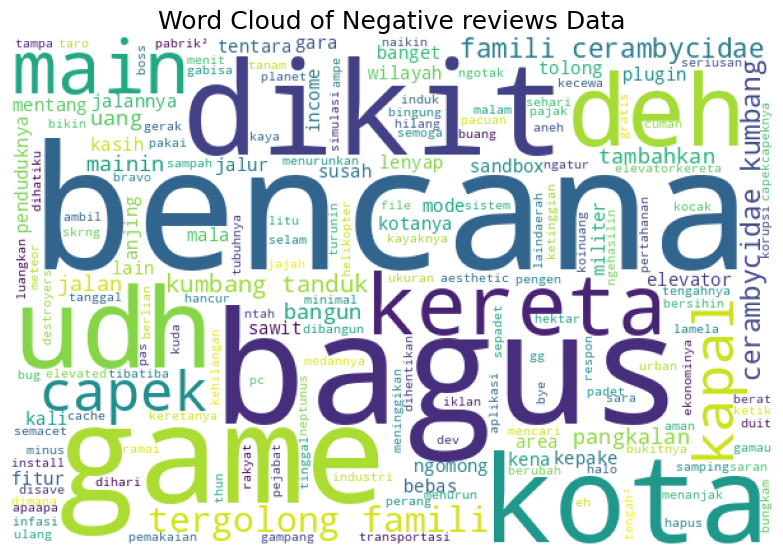

In [22]:
# Reviews Negative
list_words = ''
for review in negative_reviews['text_stopword']:
    for word in review:
        list_words += ' ' + (word)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative reviews Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

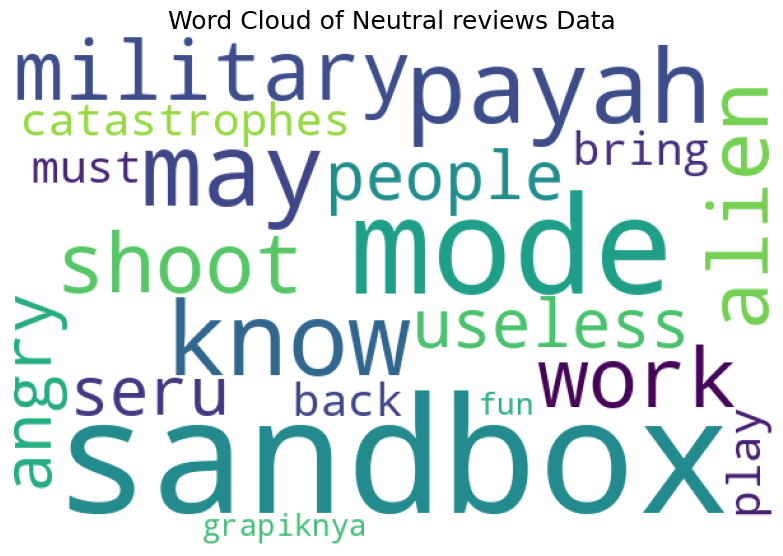

In [23]:
# list word netral
list_words = ''
for review in neutral_reviews['text_stopword']:
    for word in review:
        list_words += ' ' + (word)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral reviews Data', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

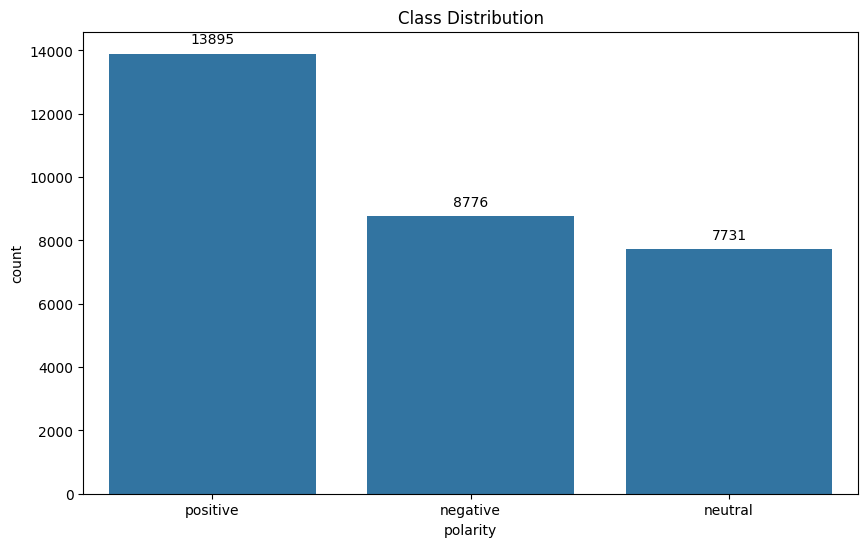

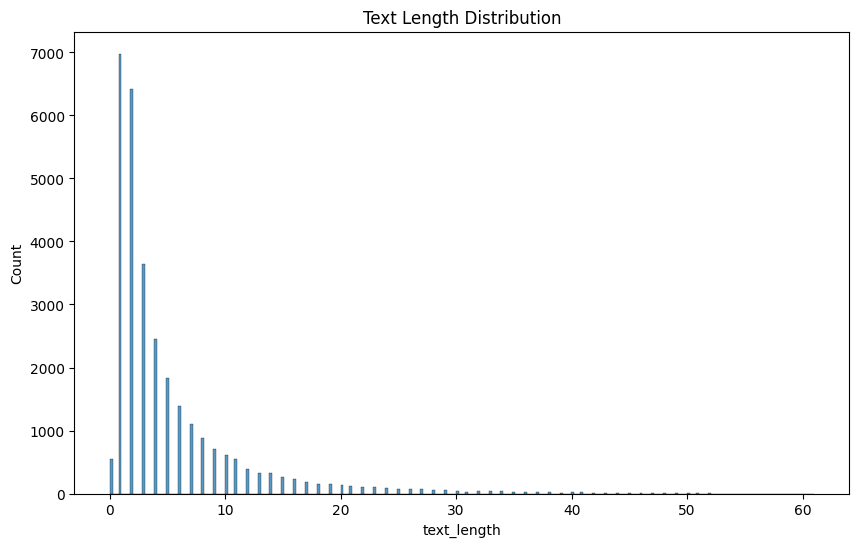

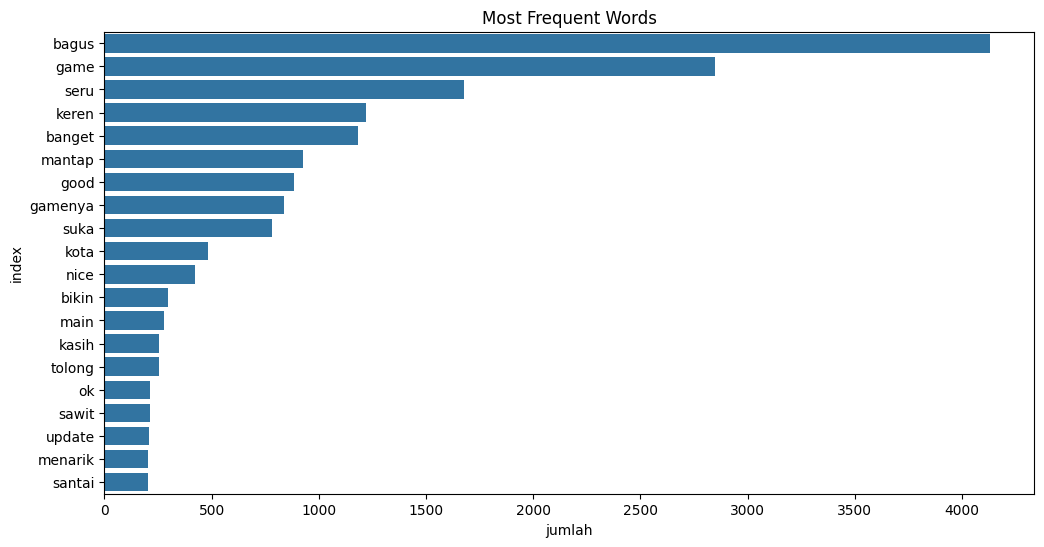

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

**Data Splitting**

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

In [26]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,44019462-ba6a-490e-8322-3cefb4fa14d5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"overal dari keseluruhan buat gamenya...sempurna, persis seperti kata-kata sambutan ketika pertama kali masuk kedalam gamenya. (game ini dibuat dengan♥️) namun ada satu keluhan yang sangat disayangkan, dan cukup merugikan bagi aku sejujurnya. ketika aku menggunakan diamond, entah itu untuk membangun atau membeli sesuatu, kemudian aku keluar tanpa menyimpan gamenya. secara otomatis kalo ngga kesimpen, bangunannya juga ngga akan ada betul kan? tapi entah kenapa diamondnya itu berkurang:(",5,297,1.12.45a,2026-01-21 01:30:39,"Hi HACKSHAW 75! 🌟 Thank you for your kind words! We're sorry about the diamond issue. Please remember to save your game to avoid losing progress. If the problem persists, feel free to contact us at info@theotown.com. Your support means a lot! 😊 Ava",2026-01-21 02:40:05,1.12.45a,overal dari keseluruhan buat gamenyasempurna persis seperti katakata sambutan ketika pertama kali masuk kedalam gamenya game ini dibuat dengan namun ada satu keluhan yang sangat disayangkan dan cukup merugikan bagi aku sejujurnya ketika aku menggunakan diamond entah itu untuk membangun atau membeli sesuatu kemudian aku keluar tanpa menyimpan gamenya secara otomatis kalo ngga kesimpen bangunannya juga ngga akan ada betul kan tapi entah kenapa diamondnya itu berkurang,overal dari keseluruhan buat gamenyasempurna persis seperti katakata sambutan ketika pertama kali masuk kedalam gamenya game ini dibuat dengan namun ada satu keluhan yang sangat disayangkan dan cukup merugikan bagi aku sejujurnya ketika aku menggunakan diamond entah itu untuk membangun atau membeli sesuatu kemudian aku keluar tanpa menyimpan gamenya secara otomatis kalo ngga kesimpen bangunannya juga ngga akan ada betul kan tapi entah kenapa diamondnya itu berkurang,overal dari keseluruhan buat gamenyasempurna persis seperti katakata sambutan ketika pertama kali masuk kedalam gamenya game ini dibuat dengan namun ada satu keluhan yang sangat disayangkan dan cukup merugikan bagi aku sejujurnya ketika aku menggunakan diamond entah itu untuk membangun atau membeli sesuatu kemudian aku keluar tanpa menyimpan gamenya secara otomatis kalau tidak kesimpen bangunannya juga tidak akan ada betul kan tapi entah kenapa diamondnya itu berkurang,"[overal, dari, keseluruhan, buat, gamenyasempurna, persis, seperti, katakata, sambutan, ketika, pertama, kali, masuk, kedalam, gamenya, game, ini, dibuat, dengan, namun, ada, satu, keluhan, yang, sangat, disayangkan, dan, cukup, merugikan, bagi, aku, sejujurnya, ketika, aku, menggunakan, diamond, entah, itu, untuk, membangun, atau, membeli, sesuatu, kemudian, aku, keluar, tanpa, menyimpan, gamenya, secara, otomatis, kalau, tidak, kesimpen, bangunannya, juga, tidak, akan, ada, betul, kan, tapi, entah, kenapa, diamondnya, itu, berkurang]","[overal, gamenyasempurna, persis, katakata, sambutan, kali, masuk, kedalam, gamenya, game, keluhan, disayangkan, merugikan, sejujurnya, diamond, membangun, membeli, menyimpan, gamenya, otomatis, kesimpen, bangunannya, diamondnya, berkurang]",overal gamenyasempurna persis katakata sambutan kali masuk kedalam gamenya game keluhan disayangkan merugikan sejujurnya diamond membangun membeli menyimpan gamenya otomatis kesimpen bangunannya diamondnya berkurang,1,positive,24
1,03ef1b94-67c6-4981-a19a-842d95c0a7fe,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"catatan saja bagi developer: bug masih banyak, dimulai dari jalan dan medan yang sulit diatur, rute kereta yang sudah di sambung tapi masih tidak terdetect sebagai

In [27]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

**TFID**

In [28]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [29]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [30]:
# Menampilkan hasil ekstraksi fitur
features_df

,add,akun,anjing,asik,asli,bagus,baguss,bagusss,bang,banget,...,uang,udh,update,versi,viral,wajib,walikota,warga,wow,zona
0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.334326,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.355895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.361592,0.0,0.0,0.0,0.0,0.17086,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30397,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30398,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30399,0.471484,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30400,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Random Forest dengan ekstrasi fitur TFID, 70/30**

In [31]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9517409896151496
Random Forest - accuracy_test: 0.8679969301611665


**BoW**

In [33]:
# Ekstrasi Fitur Bag Of Word (BOW)
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
# Bag of Words
bow = CountVectorizer(
    max_features=2000,
    min_df=5,
    max_df=0.8
)

In [35]:
X_bow = bow.fit_transform(X)

**Random Forest dengan ekstrasi fitur BoW, 80/20**

In [36]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.20, random_state=42
)

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_bow = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf_bow = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest bow - accuracy_train:', accuracy_train_rf_bow)
print('Random Forest bow - accuracy_test:', accuracy_test_rf_bow)

Random Forest bow - accuracy_train: 0.9950248756218906
Random Forest bow - accuracy_test: 0.8944252590034534


**Logistic Regression dengan ekstrasi fitur BoW, 75/25**

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.25, random_state=42
)

In [39]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.946537432568747
Logistic Regression - accuracy_test: 0.9151427443757401


**Deep Learning LSTM 80/20**

In [40]:
!pip install Tokenizer

In [41]:
# Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(clean_df['text_akhir'])

sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


# Converting labels to numerical format
le = LabelEncoder()
y = le.fit_transform(clean_df['polarity'])
y = to_categorical(y, num_classes=3)

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(
        input_dim=VOCAB_SIZE,
        output_dim=200,
        input_length=MAX_SEQUENCE_LENGTH
    ),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 kelas sentimen
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)


Epoch 1/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 382s 486ms/step - accuracy: 0.7447 - loss: 0.5984 - val_accuracy: 0.9207 - val_loss: 0.2331
Epoch 2/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 358s 470ms/step - accuracy: 0.9478 - loss: 0.1577 - val_accuracy: 0.9319 - val_loss: 0.2120
Epoch 3/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 356s 468ms/step - accuracy: 0.9710 - loss: 0.0881 - val_accuracy: 0.9365 - val_loss: 0.2094
Epoch 4/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 352s 463ms/step - accuracy: 0.9780 - loss: 0.0636 - val_accuracy: 0.9354 - val_loss: 0.2332
Epoch 5/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 354s 465ms/step - accuracy: 0.9823 - loss: 0.0532 - val_accuracy: 0.9341 - val_loss: 0.2550
Epoch 6/10
761/761 ━━━━━━━━━━━━━━━━━━━━ 364s 478ms/step - accuracy: 0.9858 - loss: 0.0431 - val_accuracy: 0.9339 - val_loss: 0.2441


In [46]:
# Evaluasiii
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, F1 score
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
y_val_argmax = np.argmax(y_val, axis=1)

print('Precision:', precision_score(y_val_argmax, y_pred, average='weighted'))
print('Recall:', recall_score(y_val_argmax, y_pred, average='weighted'))
print('F1 score:', f1_score(y_val_argmax, y_pred, average='weighted'))

# Evaluasi akurasi model LSTM pada data pelatihan
lstm_loss, lstm_accuracy_test = model.evaluate(X_val, y_val, verbose=0)

# Evaluasi akurasi model LSTM pada data
lstm_accuracy_train = history.history['accuracy'][-1]

# Menampilkan akurasi
print('LSTM - accuracy_train:', lstm_accuracy_train)
print('LSTM - accuracy_test:', lstm_accuracy_test)

191/191 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step
Precision: 0.9366019762935417
Recall: 0.936523598092419
F1 score: 0.936182915675982
LSTM - accuracy_train: 0.9846223592758179
LSTM - accuracy_test: 0.9365236163139343


**Inferensi**

In [47]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Random Forest TFID 70/30', 'Random Forest BoW 80/20', 'Logistic Regression BoW 75/25', 'LSTM 80/20'],
    'Accuracy Train': [accuracy_train_rf, accuracy_train_rf_bow, accuracy_train_lr, lstm_accuracy_train],
    'Accuracy Test': [accuracy_test_rf, accuracy_test_rf_bow, accuracy_test_lr, lstm_accuracy_test]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                           Model  Accuracy Test
0       Random Forest TFID 70/30       0.867997
1        Random Forest BoW 80/20       0.894425
2  Logistic Regression BoW 75/25       0.915143
3                     LSTM 80/20       0.936524


In [48]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                           Model  Accuracy Test
3                     LSTM 80/20       0.936524
2  Logistic Regression BoW 75/25       0.915143
1        Random Forest BoW 80/20       0.894425
0       Random Forest TFID 70/30       0.867997


Dalam kasus Sentiment Analysis ini, algoritma LSTM mencapai akurasi tertinggi sebesar 93,65%. Oleh karena itu, algoritma LSTM dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [49]:
kalimat_baru = [
    "Game ini seru banget dan bikin nagih",
    "Setelah update malah sering crash",
    "Grafiknya biasa aja"
]

sequences = tokenizer.texts_to_sequences(kalimat_baru)
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

pred = model.predict(padded)
pred_class = np.argmax(pred, axis=1)

pred_label = le.inverse_transform(pred_class)

for text, label in zip(kalimat_baru, pred_label):
    print(f"Teks: {text}")
    print(f"Prediksi Sentimen: {label}")
    print("-" * 40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Teks: Game ini seru banget dan bikin nagih
Prediksi Sentimen: positive
----------------------------------------
Teks: Setelah update malah sering crash
Prediksi Sentimen: negative
----------------------------------------
Teks: Grafiknya biasa aja
Prediksi Sentimen: neutral
----------------------------------------
